In [1]:
# Import the Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load dataset

In [2]:
# Import The Dataset
pima = pd.read_csv("pima-indians-diabetes.csv",header=None)
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Dimesions of data set
pima.shape

(768, 9)

# Rename columns

In [4]:
#rename columns
import pandas as pd
pima.rename(columns={0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age', 8: 'Outcome'}, inplace=True)


In [5]:
# Statistical info
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking the data type 
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


-  from information of the dataframe, we can get that, null values are not in dataset but from head and tail we can say that some of features has 0 value 
-  `0` is considered as null value here lets replace it with Nan

### Missing Value Treatment

In [7]:
from numpy import nan
pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]]=pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,nan)
pima.isnull().sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Replace missing values with median

In [8]:
pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, nan)
pima.fillna(pima.median(),inplace=True)

In [9]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### outlier detection

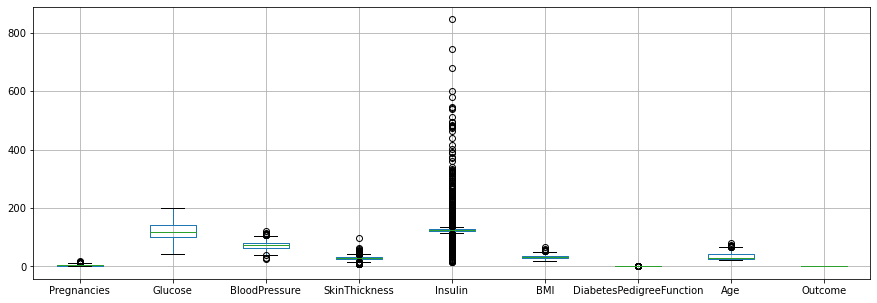

In [10]:
#detecting outlier
# Plot boxplot
plt.figure(figsize =[15,5])
pima.boxplot()
plt.show()

-  As we can see here in Insulin outlier is present, we will replace the null values with median
-  except Insulin, all feature's null value will replace with mean

In [11]:
a = pima.iloc[: , 0:8]
b = pima.iloc[: , 8]
a.shape, b.shape

((768, 8), (768,))

In [12]:
from scipy.stats import zscore

numeric_cols=a.select_dtypes(include=[np.number]).columns
z=a[numeric_cols].apply(zscore).abs()
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.529395  0.866045       0.031990       0.670643  0.181541  0.166619   
1       1.149280  1.205066       0.528319       0.012301  0.181541  0.852200   
2       1.200864  2.016662       0.693761       0.012301  0.181541  1.332500   
3       1.149280  1.073567       0.528319       0.695245  0.540642  0.633881   
4       0.142075  0.504422       2.679076       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.872334  0.679069       0.298896       2.150354  0.455573  0.064737   
764     0.813545  0.011301       0.197433       0.239949  0.181541  0.632365   
765     0.193660  0.021574       0.031990       0.695245  0.332132  0.910418   
766     1.149280  0.142800       1.024647       0.012301  0.181541  0.342790   
767     1.149280  0.942068       0.197433       0.215347  0.181541  0.299127   

     DiabetesPedigreeFunction       Age

In [13]:
my_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in my_cols:
    z.loc[z[col]>3,col]=np.nan

In [14]:
z.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
dtype: int64

In [15]:
d=z.fillna(z.median())

In [16]:
new=pd.concat([d,b],axis=1)
new.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529395,0.866045,0.031990,0.670643,0.181541,0.166619,0.468492,1.425995,1
1,1.149280,1.205066,0.528319,0.012301,0.181541,0.852200,0.365061,0.190672,0
2,1.200864,2.016662,0.693761,0.012301,0.181541,1.332500,0.604397,0.105584,1
3,1.149280,1.073567,0.528319,0.695245,0.540642,0.633881,0.920763,1.041549,0
4,0.142075,0.504422,2.679076,0.670643,0.316566,1.549303,0.642912,0.020496,1


In [17]:
X= new.iloc[:,new.columns !="Outcome"]
y= new.iloc[:,new.columns == "Outcome"]

In [18]:
y=new["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Balancing outcome by SMOTE

In [19]:
#Lets check if the data is Balanced or not
round(pima.Outcome.value_counts(normalize = True),2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

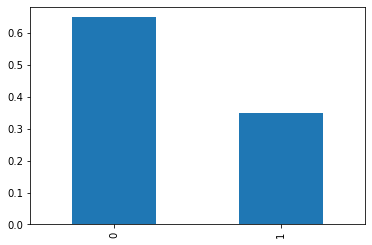

In [20]:
# Bar plot with respec to Outcoome 1 and 0 
round(pima.Outcome.value_counts(normalize = True),2).plot.bar()
plt.show()

Data is `Not Balanced`

In [21]:
from imblearn.over_sampling  import SMOTE
smt= SMOTE()
data_X,data_y =smt.fit_resample(X, y)
print(data_X.shape)
print(data_y.shape)

(1000, 8)
(1000,)


<AxesSubplot:>

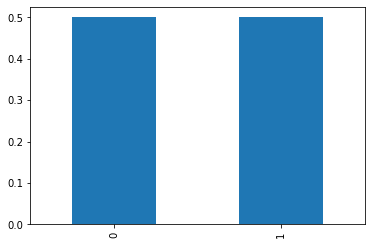

In [22]:
data_y.value_counts(normalize = True).plot.bar()

Data is `Balanced`

# Data scaling

In [23]:
from sklearn.preprocessing import StandardScaler
trans= StandardScaler()
trans.fit(X)
X=trans.fit_transform(X)

In [24]:
## split

In [25]:
#fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

In [26]:
#split into 70% for train and 30% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X,data_y, test_size=0.30, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

# Artificial Neural Network

### import necessary libraries

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from matplotlib import pyplot
from keras.models import load_model
from keras.utils import plot_model
from keras.models import Model


# Define keras model

In [28]:
model1= Sequential ()
model1.add(Dense(12, input_dim=8, activation= 'relu' ))
model1.add(Dense(1, activation= 'sigmoid' ))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


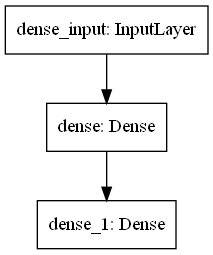

In [29]:
from keras.utils import plot_model
plot_model(model1, to_file='multilayer_perceptron_graph.png')

# Compile model

In [30]:
model1.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [31]:
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

# Fit the model

In [32]:
#Fit the model
history1=model1.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
22/22 [==============================] - 0s 14ms/step - loss: 0.7108 - accuracy: 0.5057 - val_loss: 0.7166 - val_accuracy: 0.4900
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5086 - val_loss: 0.7121 - val_accuracy: 0.4867
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5114 - val_loss: 0.7067 - val_accuracy: 0.4833
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5143 - val_loss: 0.7031 - val_accuracy: 0.4833
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5200 - val_loss: 0.6988 - val_accuracy: 0.4933
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5229 - val_loss: 0.6962 - val_accuracy: 0.5100
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5271 - val_loss: 0.6928 - val_accuracy: 0.5167
Epoch 8/200


Epoch 59/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6329 - val_loss: 0.6438 - val_accuracy: 0.6300
Epoch 60/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6300 - val_loss: 0.6426 - val_accuracy: 0.6333
Epoch 61/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6343 - val_loss: 0.6408 - val_accuracy: 0.6433
Epoch 62/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6329 - val_loss: 0.6410 - val_accuracy: 0.6333
Epoch 63/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6343 - val_loss: 0.6422 - val_accuracy: 0.6367
Epoch 64/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6386 - val_loss: 0.6404 - val_accuracy: 0.6433
Epoch 65/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6343 - val_loss: 0.6412 - val_accuracy: 0.6333
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6357 - val_loss: 0.6359 - val_accuracy: 0.6467
Epoch 117/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6314 - val_loss: 0.6356 - val_accuracy: 0.6467
Epoch 118/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6400 - val_loss: 0.6358 - val_accuracy: 0.6533
Epoch 119/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6443 - val_loss: 0.6350 - val_accuracy: 0.6500
Epoch 120/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6386 - val_loss: 0.6349 - val_accuracy: 0.6500
Epoch 121/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6386 - val_loss: 0.6341 - val_accuracy: 0.6500
Epoch 122/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6371 - val_loss: 0.6354 - val_accuracy: 0.6533
Epoch 123/200

22/22 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6371 - val_loss: 0.6321 - val_accuracy: 0.6600
Epoch 174/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6400 - val_loss: 0.6318 - val_accuracy: 0.6600
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6400 - val_loss: 0.6312 - val_accuracy: 0.6600
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6371 - val_loss: 0.6311 - val_accuracy: 0.6633
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6357 - val_loss: 0.6315 - val_accuracy: 0.6600
Epoch 178/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6386 - val_loss: 0.6310 - val_accuracy: 0.6600
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.6414 - val_loss: 0.6325 - val_accuracy: 0.6633
Epoch 180/200

# Evaluate the model

In [33]:
_,train_acc = model1.evaluate(X_train,y_train)
_,test_acc = model1.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

10/10 [==============================] - 0s 990us/step - loss: 0.6287 - accuracy: 0.6700
Train: 0.650, Test: 0.670


# Summarize history for loss

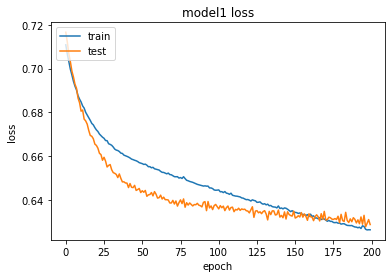

In [34]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for accuracy

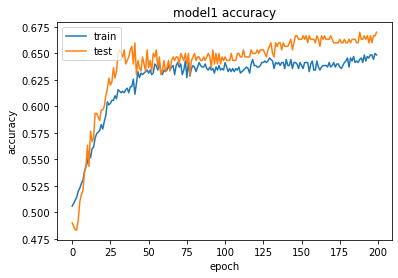

In [35]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Prediction

In [36]:
predict_y=model1.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)
print(predict_value)        

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


# Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[111  29]
 [ 70  90]]


# Classification report

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69       140
           1       0.76      0.56      0.65       160

    accuracy                           0.67       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.69      0.67      0.67       300



In [40]:
model1.save('model1.h5')

# Train two more different neural network architectues

In [41]:
model2= Sequential ()
model2.add(Dense(12, input_dim=8, activation= 'relu' ))
model2.add(Dropout(.25))
model2.add(Dense(8, activation= 'relu' ))
model2.add(Dense(1, activation= 'sigmoid' ))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


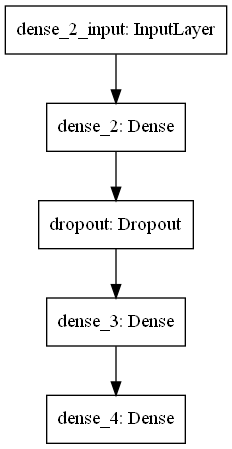

In [42]:
from keras.utils import plot_model
plot_model(model2, to_file='multilayer_perceptron_graph.png')

In [43]:
model2.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])


In [44]:
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [45]:
history2=model2.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
22/22 [==============================] - 0s 10ms/step - loss: 0.7306 - accuracy: 0.5071 - val_loss: 0.7376 - val_accuracy: 0.4300
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.4843 - val_loss: 0.7240 - val_accuracy: 0.4433
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.5043 - val_loss: 0.7178 - val_accuracy: 0.4333
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.4914 - val_loss: 0.7118 - val_accuracy: 0.4433
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5171 - val_loss: 0.7079 - val_accuracy: 0.4467
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4986 - val_loss: 0.7055 - val_accuracy: 0.4533
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5343 - val_loss: 0.7043 - val_accuracy: 0.4467
Epoch 8/200


Epoch 59/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6114 - val_loss: 0.6527 - val_accuracy: 0.6200
Epoch 60/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6100 - val_loss: 0.6532 - val_accuracy: 0.6167
Epoch 61/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.5986 - val_loss: 0.6497 - val_accuracy: 0.6300
Epoch 62/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6071 - val_loss: 0.6491 - val_accuracy: 0.6333
Epoch 63/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5829 - val_loss: 0.6499 - val_accuracy: 0.6267
Epoch 64/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6186 - val_loss: 0.6500 - val_accuracy: 0.6333
Epoch 65/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6143 - val_loss: 0.6484 - val_accuracy: 0.6367
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6357 - val_loss: 0.6355 - val_accuracy: 0.6467
Epoch 117/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6271 - val_loss: 0.6380 - val_accuracy: 0.6367
Epoch 118/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6457 - val_loss: 0.6369 - val_accuracy: 0.6433
Epoch 119/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6314 - val_loss: 0.6374 - val_accuracy: 0.6433
Epoch 120/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6329 - val_loss: 0.6370 - val_accuracy: 0.6467
Epoch 121/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6371 - val_loss: 0.6377 - val_accuracy: 0.6400
Epoch 122/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6243 - val_loss: 0.6371 - val_accuracy: 0.6400
Epoch 123/200

22/22 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6571 - val_loss: 0.6351 - val_accuracy: 0.6500
Epoch 174/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.6500 - val_loss: 0.6322 - val_accuracy: 0.6467
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6671 - val_loss: 0.6323 - val_accuracy: 0.6533
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.6429 - val_loss: 0.6319 - val_accuracy: 0.6533
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6500 - val_loss: 0.6337 - val_accuracy: 0.6533
Epoch 178/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.6529 - val_loss: 0.6328 - val_accuracy: 0.6567
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6671 - val_loss: 0.6356 - val_accuracy: 0.6433
Epoch 180/200

In [46]:
_,train_acc = model2.evaluate(X_train,y_train)
_,test_acc = model2.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

10/10 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.6533
Train: 0.697, Test: 0.653


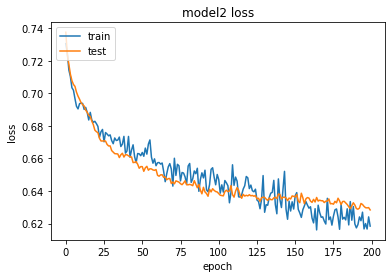

In [47]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

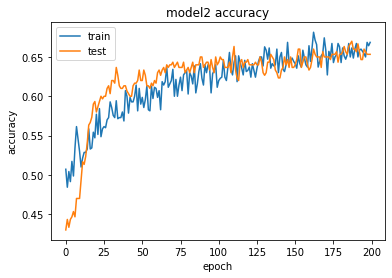

In [48]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [49]:
predict_y=model2.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)
print(predict_value)        

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[107  33]
 [ 71  89]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       140
           1       0.73      0.56      0.63       160

    accuracy                           0.65       300
   macro avg       0.67      0.66      0.65       300
weighted avg       0.67      0.65      0.65       300



In [52]:
model2.save('model2.h5')

In [53]:
model3= Sequential ()
model3.add(Dense(10, input_dim=8, activation= 'relu' ))
model3.add(Dense(8, activation= 'relu' ))
model3.add(Dense(6, activation= 'relu' ))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation= 'sigmoid' ))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


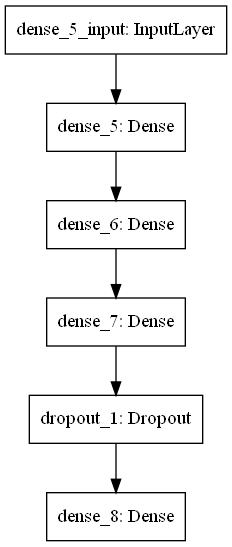

In [54]:
from keras.utils import plot_model
plot_model(model3, to_file='multilayer_perceptron_graph.png')

In [55]:
model3.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [56]:
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [57]:
history3=model3.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=200)

Epoch 1/200
22/22 [==============================] - 0s 11ms/step - loss: 0.7038 - accuracy: 0.5343 - val_loss: 0.7003 - val_accuracy: 0.5367
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.5171 - val_loss: 0.6933 - val_accuracy: 0.5500
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4943 - val_loss: 0.6948 - val_accuracy: 0.5400
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5300 - val_loss: 0.6892 - val_accuracy: 0.5500
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5371 - val_loss: 0.6888 - val_accuracy: 0.5600
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5257 - val_loss: 0.6871 - val_accuracy: 0.5500
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5243 - val_loss: 0.6872 - val_accuracy: 0.5533
Epoch 8/200


Epoch 59/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6357 - val_loss: 0.6452 - val_accuracy: 0.6300
Epoch 60/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6286 - val_loss: 0.6474 - val_accuracy: 0.6333
Epoch 61/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6386 - val_loss: 0.6422 - val_accuracy: 0.6333
Epoch 62/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6429 - val_loss: 0.6508 - val_accuracy: 0.6300
Epoch 63/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6600 - val_loss: 0.6480 - val_accuracy: 0.6267
Epoch 64/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6386 - val_loss: 0.6443 - val_accuracy: 0.6300
Epoch 65/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6514 - val_loss: 0.6462 - val_accuracy: 0.6233
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6571 - val_loss: 0.6321 - val_accuracy: 0.6467
Epoch 117/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6643 - val_loss: 0.6337 - val_accuracy: 0.6533
Epoch 118/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6700 - val_loss: 0.6327 - val_accuracy: 0.6567
Epoch 119/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6600 - val_loss: 0.6333 - val_accuracy: 0.6500
Epoch 120/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.6614 - val_loss: 0.6331 - val_accuracy: 0.6533
Epoch 121/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6829 - val_loss: 0.6341 - val_accuracy: 0.6433
Epoch 122/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6786 - val_loss: 0.6378 - val_accuracy: 0.6533
Epoch 123/200

22/22 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7029 - val_loss: 0.6192 - val_accuracy: 0.6700
Epoch 174/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7100 - val_loss: 0.6183 - val_accuracy: 0.6767
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7214 - val_loss: 0.6193 - val_accuracy: 0.6733
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7186 - val_loss: 0.6239 - val_accuracy: 0.6733
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7100 - val_loss: 0.6121 - val_accuracy: 0.6767
Epoch 178/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7129 - val_loss: 0.6206 - val_accuracy: 0.6700
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7300 - val_loss: 0.6290 - val_accuracy: 0.6767
Epoch 180/200

In [58]:
_,train_acc = model3.evaluate(X_train,y_train)
_,test_acc = model3.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

10/10 [==============================] - 0s 975us/step - loss: 0.6264 - accuracy: 0.6767
Train: 0.736, Test: 0.677


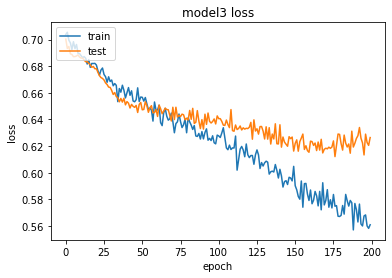

In [59]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

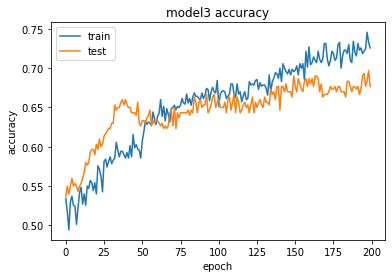

In [60]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [61]:
predict_y=model3.predict(X_test)
predict_value=[]
for predict in predict_y:
    if predict>0.5:
     predict_value.append(1)
    else:
        predict_value.append(0)
print(predict_value)        

[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]


# Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_value))

[[ 94  46]
 [ 51 109]]


# Classification report

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_value))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       140
           1       0.70      0.68      0.69       160

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



In [64]:
model3.save('model3.h5')

# Create a Python list of loaded models

In [65]:
#load models from file
from keras.models import load_model
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'model' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

# Call this function to load three saved models

In [66]:
# load all models
n_members = 3
members = load_all_models(n_members)
print('Loaded %d model' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
Loaded 3 model


# Prepare a training dataset for the meta-learner

In [67]:
# create stacked model input dataset as outputs from the ensemble
from numpy import dstack
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

# Use the prepared training dataset to fit a meta-learner model

In [68]:
# fit a model based on the outputs from the ensemble members
from sklearn.linear_model import LogisticRegression
def fit_stacked_model(members, inputX, inputy):
# create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
# fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model

# Make a prediction with the stacked model

In [69]:
def stacked_prediction(members, model, inputX):
# create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
#make a prediction
    yhat = model.predict(stackedX)
    return yhat

# Evaluate each single model on the training dataset and establish a baseline of performance

In [70]:
# evaluate standalone models on test dataset
for model in members:
    y_test_enc = y_test
    _, acc = model.evaluate(X_test, y_test_enc, verbose=0)
    print('Model Accuracy: %.3f' % acc)

Model Accuracy: 0.670
Model Accuracy: 0.653
Model Accuracy: 0.677


# Fit stacked model using the ensemble

In [71]:
from sklearn.metrics import accuracy_score
model = fit_stacked_model(members, X_test, y_test)

# Evaluate model on test set

In [72]:
yhat = stacked_prediction(members, model, X_test)
acc = accuracy_score(y_test_enc, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

Stacked Test Accuracy: 0.703


In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_enc, yhat))

[[ 94  46]
 [ 43 117]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test_enc, yhat))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       140
           1       0.72      0.73      0.72       160

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

